<a href="https://colab.research.google.com/github/aravindan155/AKumaranProjects/blob/main/CDC_Overdose_FL_and_MN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   State  Year      Month                       Indicator  Data Value
0     FL  2020      April  Number of Drug Overdose Deaths      6238.0
1     FL  2020     August  Number of Drug Overdose Deaths      7249.0
2     FL  2020   December  Number of Drug Overdose Deaths      7568.0
3     FL  2020    January  Number of Drug Overdose Deaths      5638.0
4     FL  2020       July  Number of Drug Overdose Deaths      7049.0
5     FL  2020       June  Number of Drug Overdose Deaths      6833.0
6     FL  2020      March  Number of Drug Overdose Deaths      6002.0
7     FL  2020        May  Number of Drug Overdose Deaths      6633.0
8     FL  2020   November  Number of Drug Overdose Deaths      7512.0
9     FL  2020    October  Number of Drug Overdose Deaths      7444.0
10    FL  2020  September  Number of Drug Overdose Deaths      7422.0
11    MN  2020      April  Number of Drug Overdose Deaths       858.0
12    MN  2020     August  Number of Drug Overdose Deaths       976.0
13    MN  2020   Dec

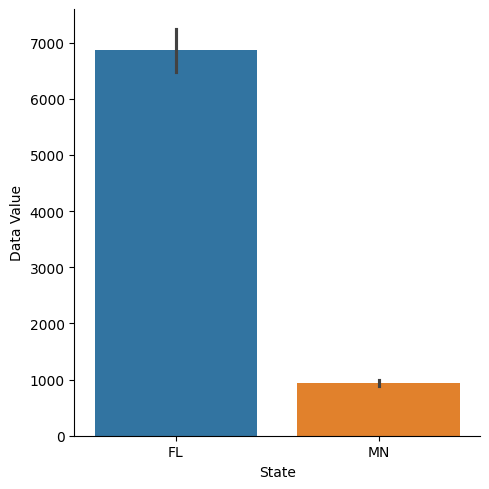

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r'c:\Users\Aru\Downloads\VSRR_Provisional_Drug_Overdose_Death_Counts_20250215.csv')
# Filter for Florida and Minnesota, years 2020-2024, and specific months
filtered_df = df[
    (df['State'].isin(['FL', 'MN'])) &
    (df['Year'].between(2020, 2024)) &
    (df['Month'].isin(['March', 'April', 'May', 'June', 'July',
                       'August', 'September', 'October', 'November',
                       'December', 'January'])) &
    (df['Indicator'] == 'Number of Drug Overdose Deaths')  # Specifically for drug overdose deaths
]

# Sort values
filtered_df = filtered_df.sort_values(['State', 'Year', 'Month'])

# Select relevant columns including Data Value
columns_to_keep = ['State', 'Year', 'Month', 'Indicator', 'Data Value']
filtered_df = filtered_df[columns_to_keep]

# Reset index
filtered_df = filtered_df.reset_index(drop=True)

# Display the result
print(filtered_df)

# Show total number of records
print(f"\nNumber of rows in filtered data: {len(filtered_df)}")
#Only 2020 returned due to missing data
sns.catplot(data=filtered_df, x="State", y="Data Value", hue="State", kind="bar")
mean_FL_OD_2020 = filtered_df[(filtered_df['State'] == 'FL') & (filtered_df['Year'] == 2020)]['Data Value'].mean()
mean_MN_OD_2020 = filtered_df[(filtered_df['State'] == 'MN') & (filtered_df['Year'] == 2020)]['Data Value'].mean()
SD_FL_OD_2020 = filtered_df[(filtered_df['State'] == 'FL') & (filtered_df['Year'] == 2020)]['Data Value'].std()
SD_MN_OD_2020 = filtered_df[(filtered_df['State'] == 'MN') & (filtered_df['Year'] == 2020)]['Data Value'].std()
MD_FL_OD_2020 = filtered_df[(filtered_df['State'] == 'FL') & (filtered_df['Year'] == 2020)]['Data Value'].median()
MD_MN_OD_2020 = filtered_df[(filtered_df['State'] == 'MN') & (filtered_df['Year'] == 2020)]['Data Value'].median()
print(f"\nMean of FL drug overdose deaths in 2020: {mean_FL_OD_2020}")
print(f"Mean of MN drug overdose deaths in 2020: {mean_MN_OD_2020}")
print(f"Standard deviation of FL drug overdose deaths in 2020: {SD_FL_OD_2020}")
print(f"Standard deviation of MN drug overdose deaths in 2020: {SD_MN_OD_2020}")
print(f"Median of FL drug overdose deaths in 2020: {MD_FL_OD_2020}")
print(f"Median of MN drug overdose deaths in 2020: {MD_MN_OD_2020}")
from scipy import stats
# Perform independent Mann Whitney U test
stat, p = stats.mannwhitneyu(
    filtered_df[(filtered_df['State'] == 'FL') & (filtered_df['Year'] == 2020)]['Data Value'],
    filtered_df[(filtered_df['State'] == 'MN') & (filtered_df['Year'] == 2020)]['Data Value']
)
print(f"\nMann Whitney U test statistic: {stat}")
print(f"p-value: {p}")
#There is a significant difference between the number of drug overdose deaths in Florida and Minnesota in 2020  (p < 0.05)
#Mann Whitney U test is used because the data is not normally distributed
#Score is positive because the data from Florida is higher than the data from Minnesota










